In [173]:
from specim.specfuncs import spec1d
from keckcode.deimos import deimosmask1d
import os
import matplotlib.pyplot as plt
import numpy as np

In [174]:
models_dir = "/Users/patrick/code/spectra_code/data"
data_dir="/Volumes/workspace/Data/reduced/Science"
files = os.listdir(models_dir)
print(files)

['ellipticals.dat', 'S0.dat', 'Sa.dat', 'Sb.dat', 'Sc.dat', 'README.txt', 'SB4.dat']


In [175]:
specs = {}
for file in files:
    if file == "README.txt":
        pass
    else:
        specs.update({file.split('.')[0]: spec1d.Spec1d(os.path.join(models_dir, file))} )


Reading spectrum from /Users/patrick/code/spectra_code/data/ellipticals.dat
Expected file format: text
 Spectrum Start:  1100.00
 Spectrum End:    30000.00
 Dispersion (1st pixel):   4.00
 Dispersion (average):     13.04


Reading spectrum from /Users/patrick/code/spectra_code/data/S0.dat
Expected file format: text
 Spectrum Start:  1100.00
 Spectrum End:    30000.00
 Dispersion (1st pixel):   4.00
 Dispersion (average):     13.03


Reading spectrum from /Users/patrick/code/spectra_code/data/Sa.dat
Expected file format: text
 Spectrum Start:  1100.00
 Spectrum End:    30000.00
 Dispersion (1st pixel):   4.00
 Dispersion (average):     12.97


Reading spectrum from /Users/patrick/code/spectra_code/data/Sb.dat
Expected file format: text
 Spectrum Start:  1100.00
 Spectrum End:    30000.00
 Dispersion (1st pixel):   4.00
 Dispersion (average):     13.04


Reading spectrum from /Users/patrick/code/spectra_code/data/Sc.dat
Expected file format: text
 Spectrum Start:  1100.00
 Spectrum End:

In [176]:
print(specs.keys())    

dict_keys(['ellipticals', 'S0', 'Sa', 'Sb', 'Sc', 'SB4'])


In [177]:
def get_flux(waverange, **kwargs):
    wavelengths = specs['ellipticals'].x
    start_index = 0
    end_index = 0
    for index, value in enumerate(wavelengths):
        if value >= waverange[0] and start_index == 0:
            start_index = index
        if value >= waverange[1]:
            end_index = index
            break
    
    items = {}
    for k, v in specs.items():
        wavelengths = v.x[start_index:end_index+1]
        flux = v.y[start_index: end_index+1]
        items.update({k: {'wavelengths': wavelengths, 'flux': flux}})
        
    return items

    
    
    

In [178]:
def build_model(limits, weights, z):
    data = get_flux(limits)
    model_flux = []
    wavelengths = data['ellipticals']['wavelengths']
    for index, val in enumerate(wavelengths):
        flux = 0
        for key, val in weights.items():
            flux += data[key]['flux'][index]*val
    
        model_flux.append(flux)
    wavelengths = wavelengths*(1+z)
    return {'wavelengths': wavelengths, 'flux': model_flux/model_flux[0]}
        
    

In [200]:
def model_spectra(spectra, mask):
    plt.figure(figsize=(20,10))
    plt.plot(spectra['wav'], spectra['flux'])
    weights = {'ellipticals': 0, 'S0': 0, 'Sa': 0, 'Sb': 0, 'Sc': 0.85, 'SB4': 0.15}
    model = build_model([2000, 7000], weights, 0.338)
    fit = np.polyfit(spectra['wav'], spectra['flux'], 4)
    poly = np.poly1d(fit)
    plt.plot(spectra['wav'], spectra['flux'])
    start = spectra['wav'][0]
    end = spectra['wav'][-1]
    
    startval = 0
    endval = 0


    for index, val in enumerate(model['wavelengths']):
        if val >= start and startval ==0:
            startval = index  
        if val >= end:
            endval = index
            break
        
    plt.plot(model['wavelengths'][startval:endval], model['flux'][startval:endval]*poly(model['wavelengths'][startval:endval]))


    


Loading 109 spectra from /Volumes/workspace/Data/reduced/Science/spec1d_d0721_0057-2209m1_DEIMOS_2017Jul21T091032.880.fits


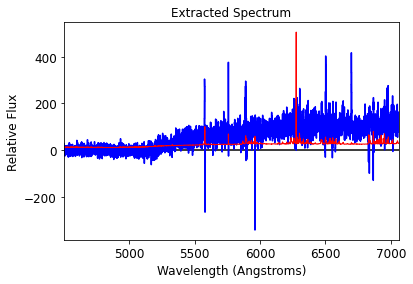

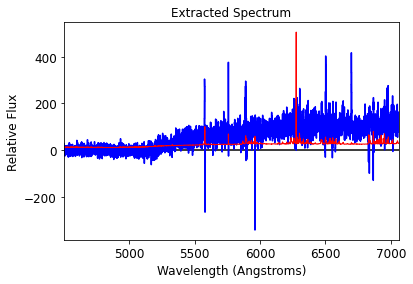

In [197]:
mask = deimosmask1d.DeimosMask1d(os.path.join(data_dir, 'spec1d_d0721_0057-2209m1_DEIMOS_2017Jul21T091032.880.fits'))
mask[0].plot()



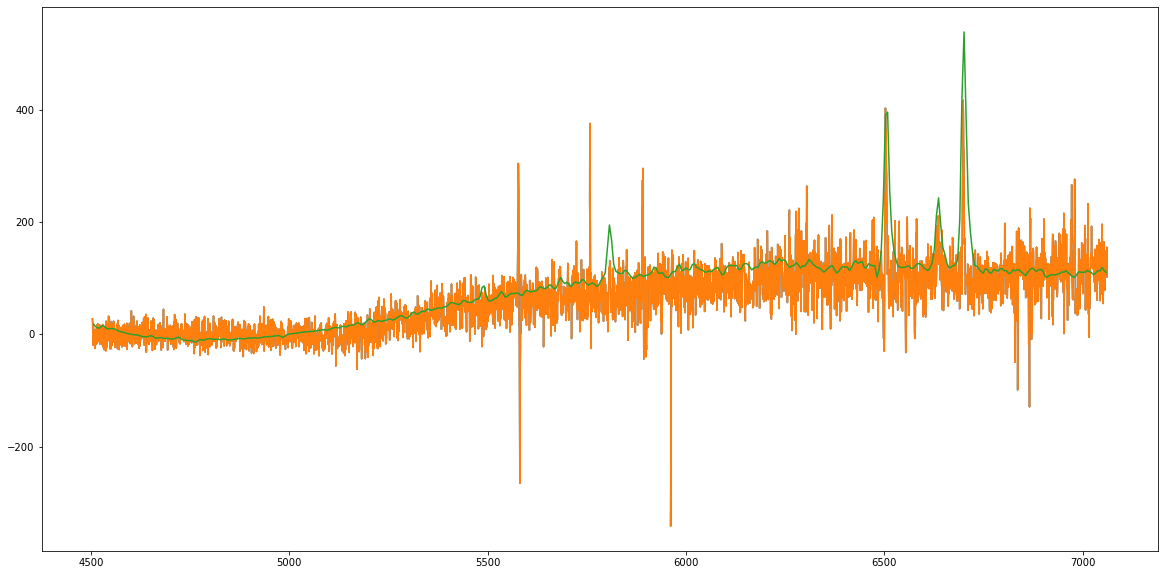

In [201]:
model_spectra(mask[0], mask)

In [182]:


mask[0]['wav']

4503.797810263004
4504.393648531076
4504.989634677419
4505.587780485977
4506.177930514282
4506.783957834462
4507.384396465081
4507.981018252517
4508.579481869603
4509.178006468194
4509.776591891246


       wav        
------------------
 4503.797810263004
 4504.393648531076
 4504.989634677419
 4505.587780485977
 4506.177930514282
 4506.783957834462
 4507.384396465081
 4507.981018252517
 4508.579481869603
 4509.178006468194
               ...
 7054.580782444093
 7055.265227327609
 7055.877014240668
 7056.465791036638
7057.2088996282555
 7057.809199046879
7058.3995514142935
 7059.036084529254
 7059.672619486652
 7060.309156133385
7060.9456932572275
Length = 4096 rows


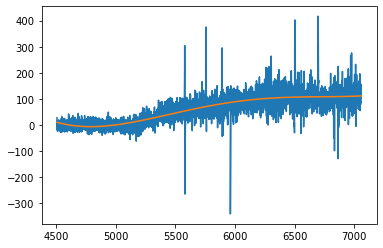

In [140]:
fit = np.polyfit(mask[0]['wav'], mask[0]['flux'], 4)
poly = np.poly1d(fit)
plt.plot(mask[0]['wav'], mask[0]['flux'])
plt.plot(mask[0]['wav'], poly(mask[0]['wav']))